In [2]:
from haven import haven_jupyter as hj

hj.init_datatable_mode()
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

<IPython.core.display.Javascript object>

In [3]:
map_exp_list = [
                                             ({'opt':{'name':'svrg'}}, {'label':'SVRG', 'markevery':10, 'color':'blue'}),
                                             ({'opt':{'name':'adam'}}, {'label':'Adam', 'markevery':10, 'color':'orange'}),
                                             ({'opt':{'name':'adagrad'}}, {'label':'Adagrad', 'markevery':10, 'color':'green'}),
    ({'batch_size':100, 'batch_grow_factor':1.01, 'opt':{'name':'ssn'}}, {'label':'R-SSN-grow', 'markevery':10, 'color':'purple'}),
                                             ({'batch_size':100, 'batch_grow_factor':None, 'opt':{'name':'ssn'}}, {'label':'R-SSN-const', 'markevery':10, 'color':'red'}),
                                             
                                             ({'opt':{'name':'slbfgs'}}, {'label':'sLBFGS', 'markevery':10, 'color':'teal'}),
                                             ({'opt':{'name':'lbfgs'}}, {'label':'LBFGS', 'markevery':10, 'color':'black'}),
                                             ({'opt':{'name':'ssn', 'lm':0}}, {'label':'Newton', 'markevery':10, 'color':'brown'}),
#                                              ({'opt':{'name':'ssn'}}, {'label':'R-SSN-const', 'markevery':10}),
#                                              ({'opt':{'name':'svrg'}}, {'label':'Newton', 'markevery':10}),
#                                              ({'opt':{'name':'svrg'}}, {'label':'Newton', 'markevery':10})
                                            ]

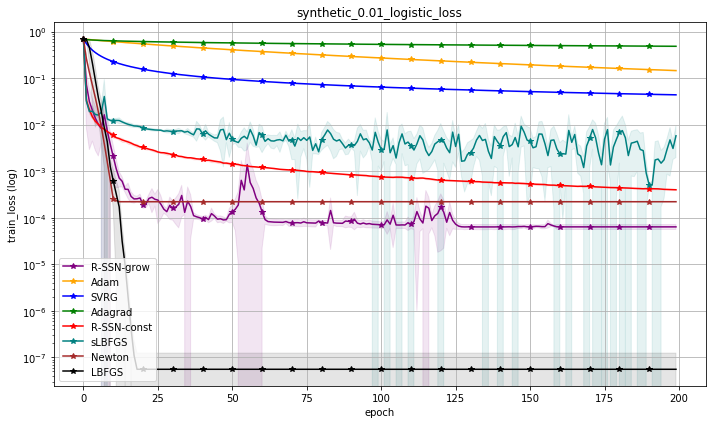

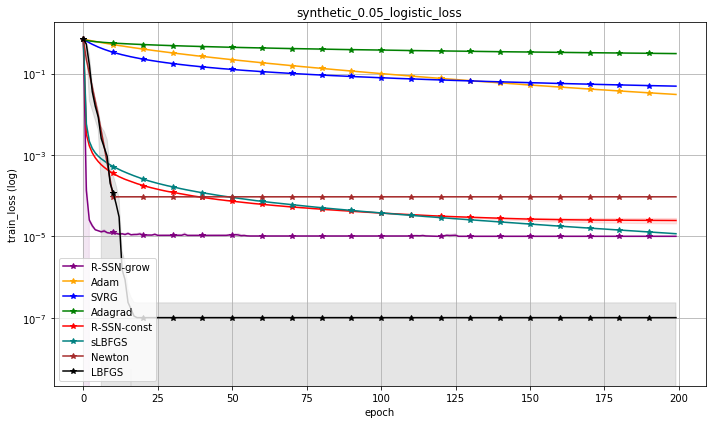

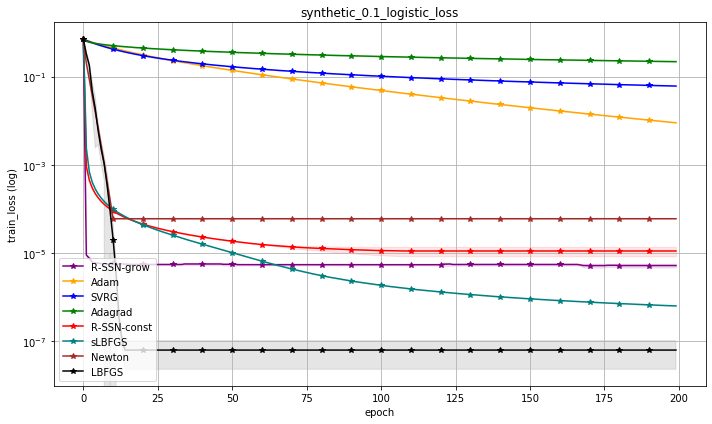

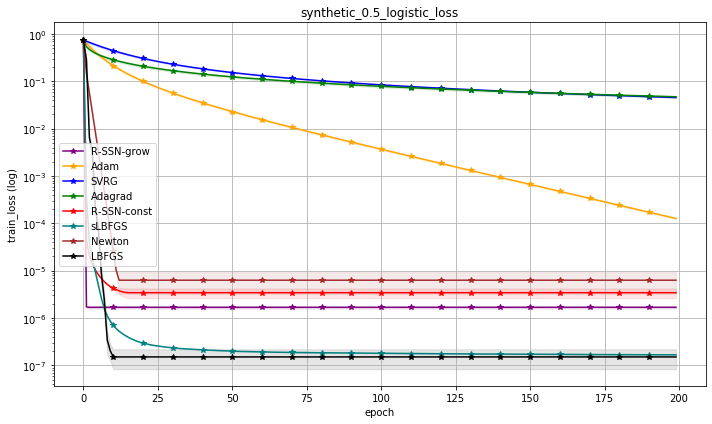

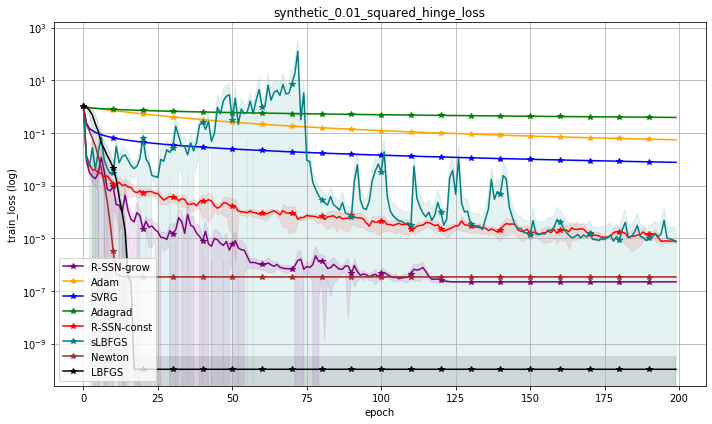

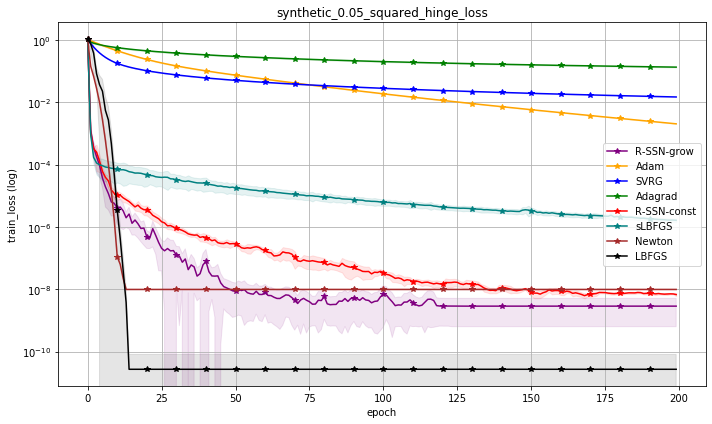

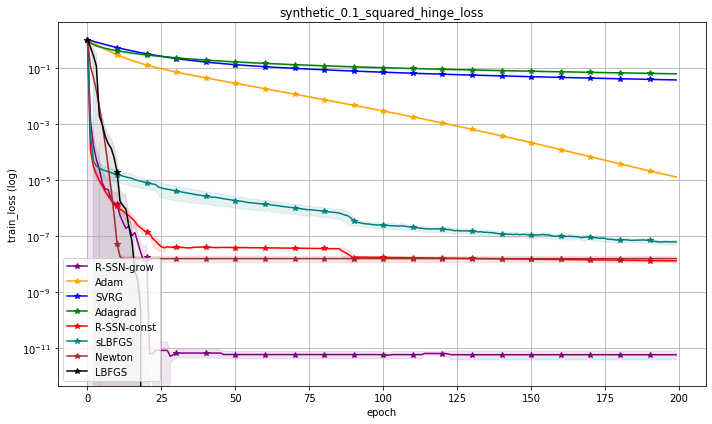

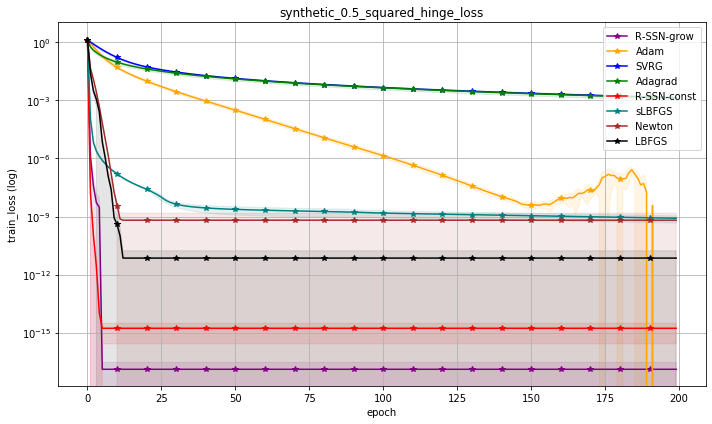

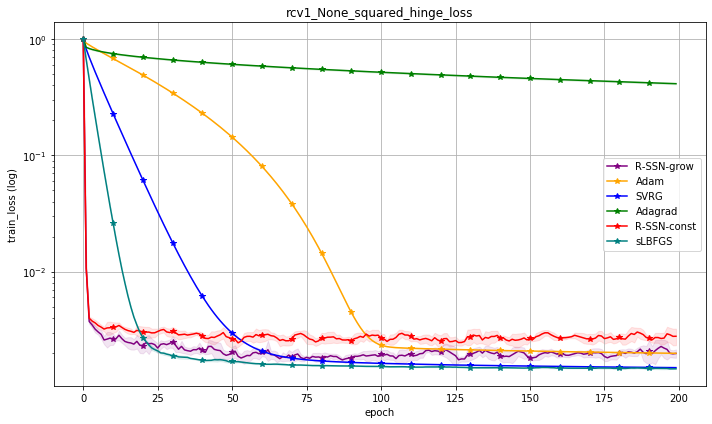

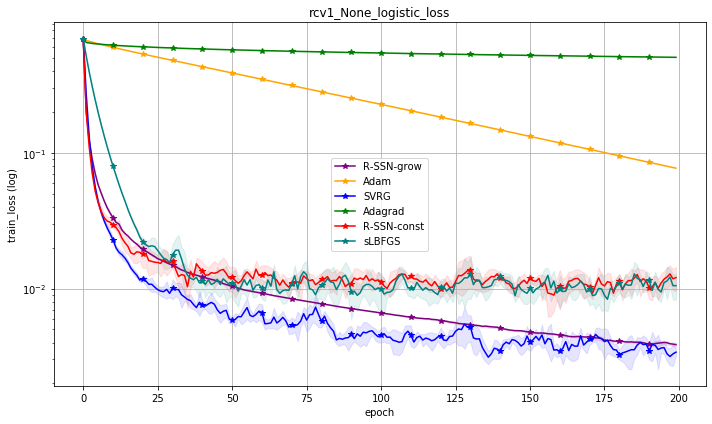

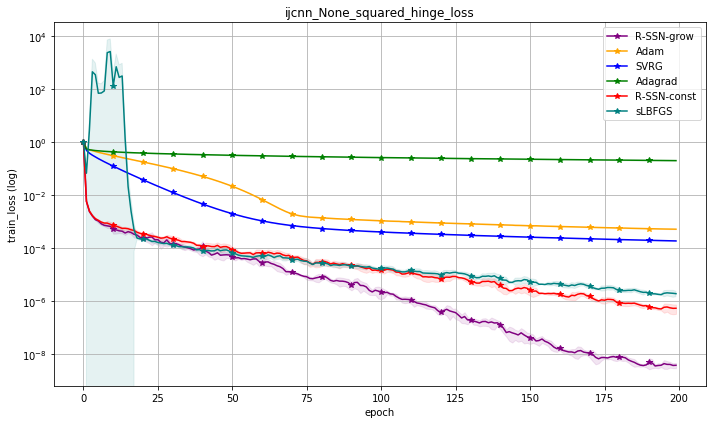

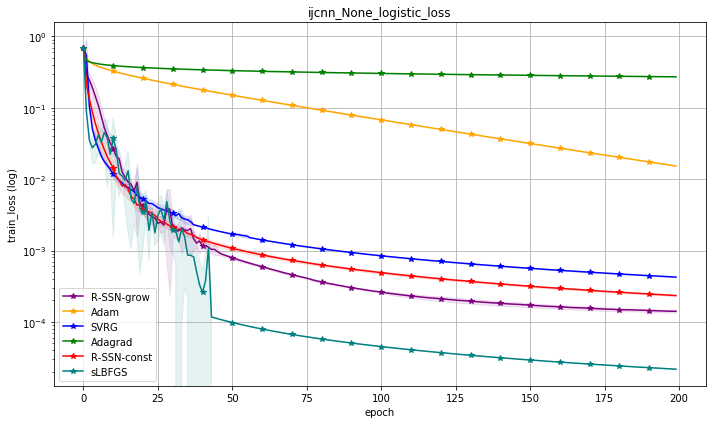

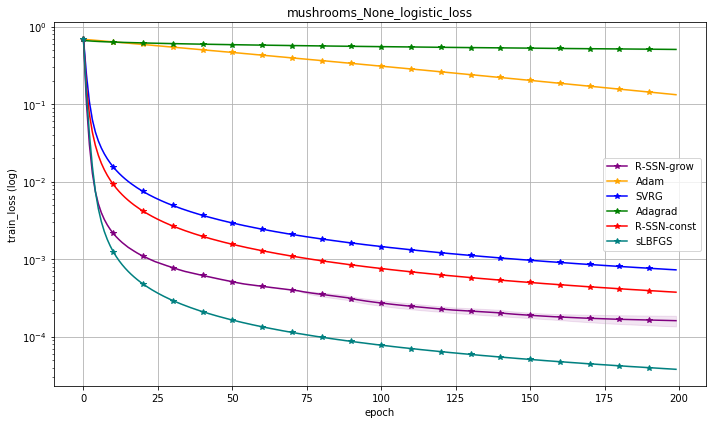

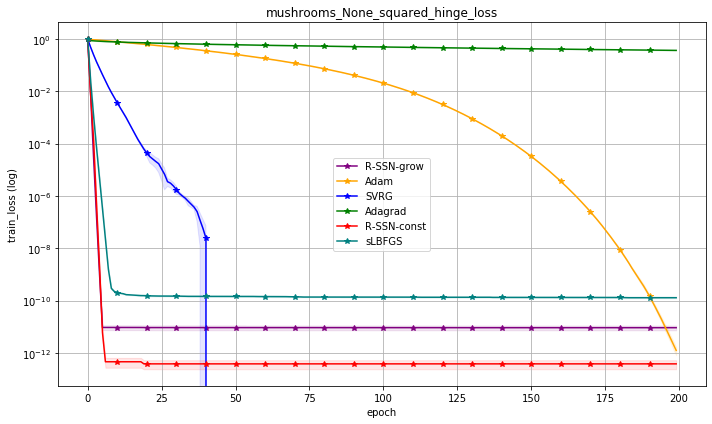

In [5]:
# Get Results
from haven import haven_results as hr
for exp_group in [
    "syn_logistic",
    "syn_squared_hinge",
     "rcv1_squared_hinge",
     "rcv1_logistic",
    'ijcnn_squared_hinge',
    'ijcnn_logistic',
                  'mushrooms_logistic',  
    'mushrooms_squared_hinge'
                 ]:
    
    rm = hr.ResultManager(savedir_base='/mnt/datasets/public/issam/prototypes/ssn/borgy/',
                              workdir='/home/issam/Research_Ground/ssn',
                              exp_group_list=[
                                  exp_group 
                              ],
#                           filterby_list=[{'batch_grow_factor':1.01, 'opt':{'name':'ssn'}}],
                              groupby_list=['dataset', 'margin', 'loss_func'],
                                  verbose=0)
    fig_list = rm.get_plot_all(y_metric_list=['train_loss'], 
                                   order='groups_by_metrics',
                                   x_metric='epoch', 
                                   figsize=(10,6),
                                   log_metric_list=['train_loss'],
                                   map_exp_list=map_exp_list,
                                   title_list=['dataset', 'margin', 'loss_func'],
                                   legend_list=['opt', 'runs'], 
                               avg_across='runs'
                              ) 


#     rm.get_job_stats()

In [ ]:
import sys
from importlib import reload
!{sys.executable} -m pip install --upgrade  --no-dependencies '/home/issam/Research_Ground/haven/' --user



reload(hr)